<a href="https://colab.research.google.com/github/liyanse/Object_Detection/blob/main/ObjectDetectionWithYoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:31tcmalloc: large alloc 1147494400 bytes == 0x6617a000 @  0x7f68727a5615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████               | 1055.7 MB 1.6 MB/s eta 0:09:33tcmalloc: large alloc 1434370048 bytes == 0x39a2000 @  0x7f68727a5615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15093, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15093 (delta 0), reused 3 (delta 0), pack-reused 15088
Receiving objects: 100% (15093/15093), 13.68 MiB | 17.51 MiB/s, done.
Resolving deltas: 100% (10439/10439), done.


In [3]:
!cd yolov5 & pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 34.5 MB/s 


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-18 Python-3.7.15 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15110MiB)



[Errno 2] No such file or directory: '/usr/local/lib/python3.7/dist-packages/torch-1.12.1+cu113.dist-info/METADATA'


  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
!pip install unrar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!unrar x /content/data.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/data.rar

Creating    data                                                      OK
Creating    data/images                                               OK
Extracting  data/images/2021-07-09-09-09-05.jpg                            0%  OK 
Extracting  data/images/2021-07-09-09-09-09.jpg                            1%  OK 
Extracting  data/images/2021-07-09-17-49-24.jpg                            2%  OK 
Extracting  data/images/2021-08-01-07-31-35.jpg                            2%  OK 
Extracting  data/images/2021-08-01-07-31-45.jpg                            3%  OK 
Extracting  data/images/2021-08-08-10-31-26.jpg                            4%  OK 
Extracting  data/images/2021-08-14-12-53-58.jpg                            5%  OK 
Extracting  data/images/2021-08-14-12-54-01.jpg                            6%  OK 
Extracting  da

In [9]:
import uuid   # Unique identifier
import os
import time

In [10]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['impala','other','zebra']
number_imgs = 5

In [10]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

In [11]:
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-18 Python-3.7.15 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


[Errno 2] No such file or directory: '/usr/local/lib/python3.7/dist-packages/torchvision-0.13.1+cu113.dist-info/METADATA'


In [14]:
img = os.path.join('data', 'images', '/content/data/images/DSC_0084.JPG')

In [15]:
results = model(img)

In [16]:
results.print()

image 1/1: 3072x4608 5 impalas, 1 other
Speed: 347.6ms pre-process, 19.6ms inference, 2.4ms NMS per image at shape (1, 3, 448, 640)


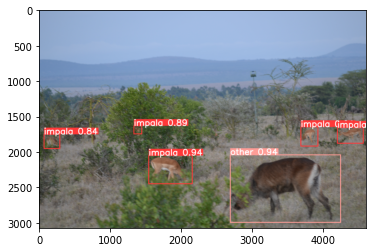

In [17]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [18]:
img = os.path.join('data', 'images', '/content/data/images/2021-08-08-10-31-26.jpg')

In [19]:
results = model(img)

In [20]:
results.print()

image 1/1: 720x1280 3 others
Speed: 26.9ms pre-process, 19.1ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)


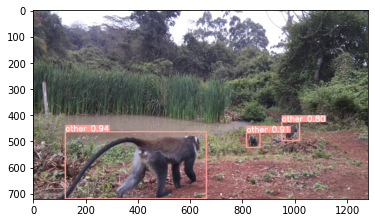

In [21]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')